In [1]:
#tensorflow
import tensorflow as tf

#keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("C:/sourceTree/DataScience/ICT/Py_Project/20201208-day37/data-02-stock_daily.csv", header=1)#header:헤더로 설정할 행의 번호. 원본을 편집않도록 도와주는 고마운 존재!
data

,Open,High,Low,Volume,Close
0,828.659973,833.450012,828.349976,1247700,831.659973
1,823.020020,828.070007,821.655029,1597800,828.070007
2,819.929993,824.400024,818.979980,1281700,824.159973
3,819.359985,823.000000,818.469971,1304000,818.979980
4,819.000000,823.000000,816.000000,1053600,820.450012
...,...,...,...,...,...
727,599.992707,604.832763,562.192568,147100,567.002574
728,558.712504,568.452595,558.712504,7900,567.162558
729,566.892592,567.002574,556.932537,10800,556.972503
730,561.202549,566.432590,558.672539,41200,559.992565


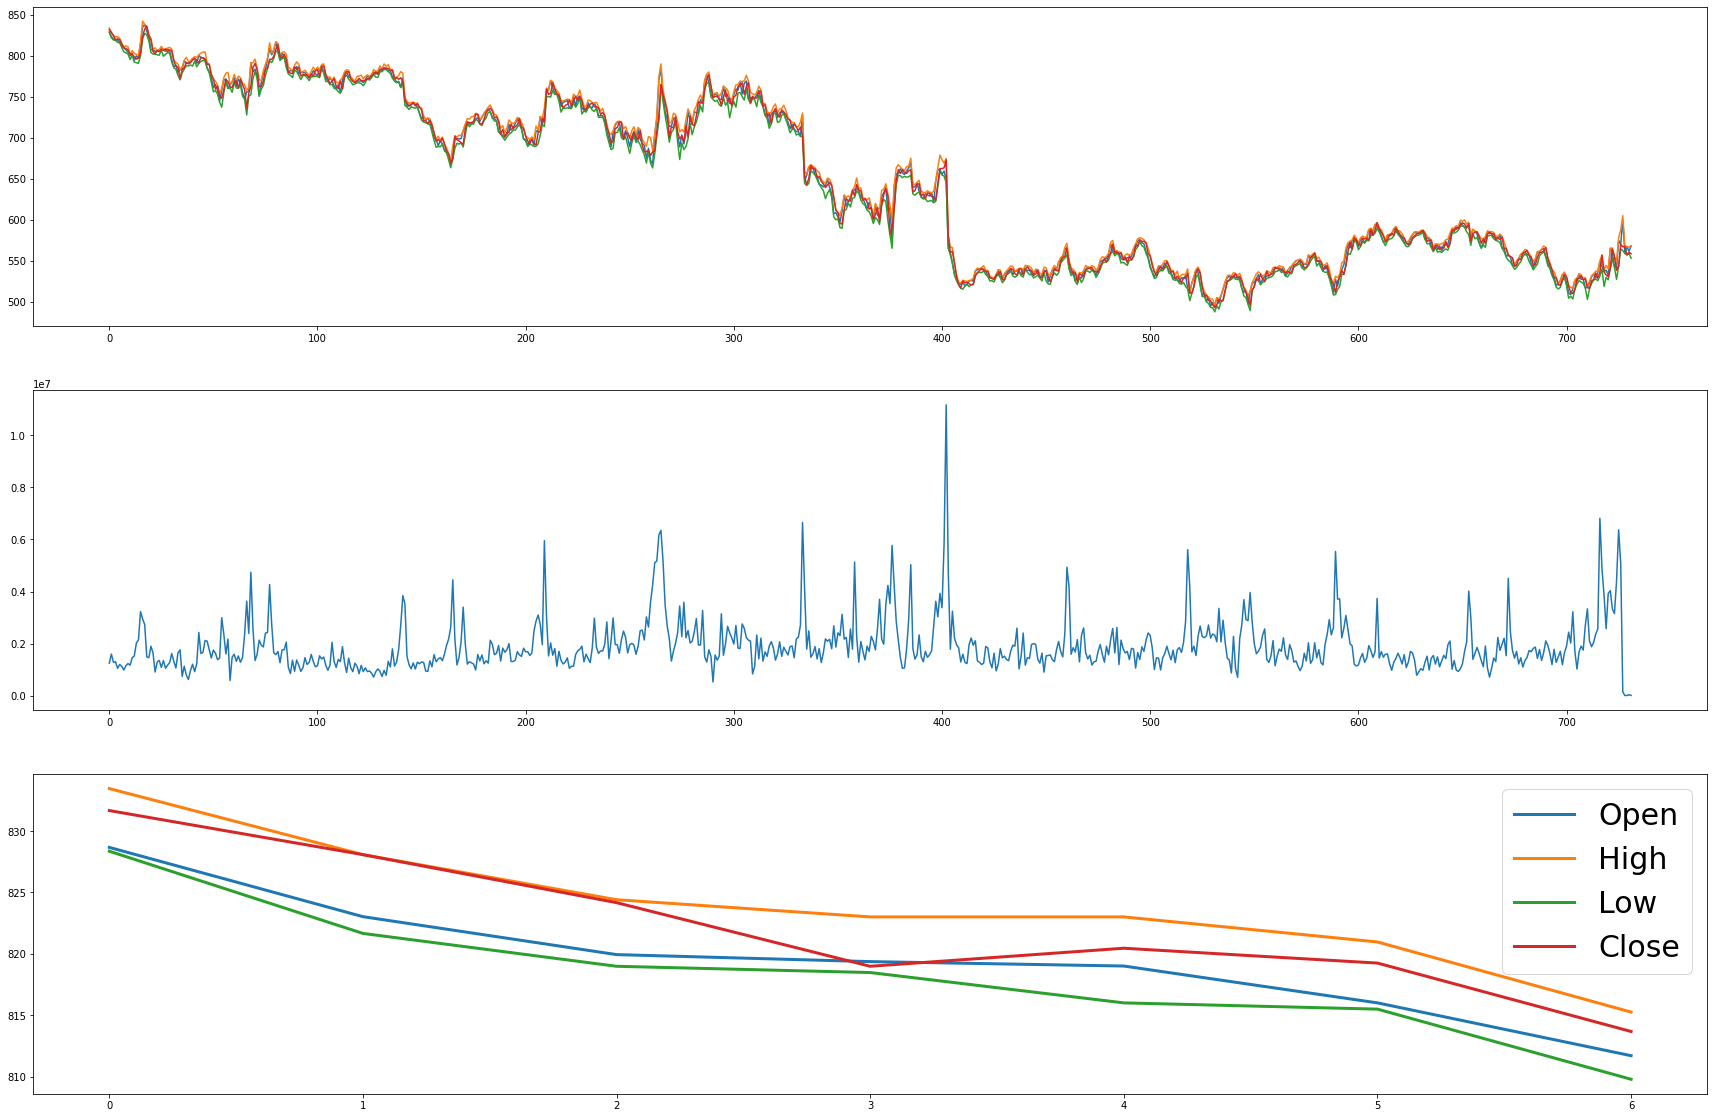

In [3]:
#데이터 시각화
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(30,20) )

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(data['Open'])
ax1.plot(data['High'])
ax1.plot(data['Low'])
ax1.plot(data['Close'])

ax2.plot(data['Volume'])

ax3.plot(data['Open'][0:7], linewidth=3.0, label="Open" )
ax3.plot(data['High'][0:7], linewidth=3.0, label="High" )
ax3.plot(data['Low'][0:7], linewidth=3.0, label="Low" )
ax3.plot(data['Close'][0:7], linewidth=3.0, label="Close" )

ax3.legend(prop={'size':30})



In [4]:
#"Open","High","Low","Volume"으로 Close 가격 예측하기
xdata = data[["Open","High","Low","Volume"]]
ydata = pd.DataFrame(data["Close"])

#데이터 정규화
from sklearn.preprocessing import StandardScaler

xdata_ss = StandardScaler().fit_transform(xdata)
ydata_ss = StandardScaler().fit_transform(ydata)

print(xdata_ss.shape, ydata_ss.shape )

(732, 4) (732, 1)


In [5]:
xtrain = xdata_ss[220: , :]
xtest  = xdata_ss[:220 , :]
ytrain = ydata_ss[220: , :]
ytest  = ydata_ss[:220 , :]

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
#220행 이후의 데이터들을 트레이닝으로 사용하여 

(512, 4) (220, 4) (512, 1) (220, 1)


In [6]:
model = Sequential()
model.add(Dense(1024, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

In [7]:
model.compile(loss='mse', optimizer='adam', metrics=['mae']) #metrics=['mae'] 평균제곱오차

In [8]:
#학습 자동 중단 설정
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor="mae", patience=10)

seed=123
np.random.seed(seed)
tf.random.set_seed(seed)
hist = model.fit(xtrain, ytrain, epochs=100, batch_size=16, callbacks=[es])


print("loss:"+str(hist.history['loss']) )
print("MAE:"+str(hist.history['mae']) )



Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0938 - mae: 0.2035
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0059 - mae: 0.0574
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0415
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0421
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0033 - mae: 0.0425
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0425
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0034 - mae: 0.0437
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0031 - mae: 0.0416
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0029 - mae: 0.0408
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0455
Epoch 11/100
32/32 [==============================] - 0s 4m

In [9]:
res = model.evaluate(xtest,ytest,batch_size=32)
print("loss:",res[0],"mae",res[1])

7/7 [==============================] - 0s 1ms/step - loss: 0.0088 - mae: 0.0846
loss: 0.008772659115493298 mae 0.0846315547823906


Evaluate : 0.00877265946202257


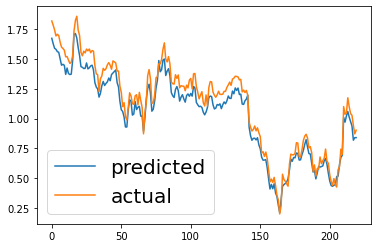

In [10]:
xhat=xtest
yhat=model.predict(xhat)
plt.figure()
plt.plot(yhat, label="predicted")
plt.plot(ytest, label="actual")
plt.legend(prop={'size':20})
print("Evaluate : {}".format(np.average((yhat-ytest)**2)))# format(np.average((yhat-ytest)**2) : 평균제곱오차